실습 #1: LangGraph를 이용해 코드의 스타일, 버그 가능성, 최적화에 대한 내용을 분석하고, 최종적으로 이 분석들을 모두 반영하여 개선한 코드를 리턴하는 어플리케이션을 작성하시오. 스타일, 버그, 최적화에 대한 점검 기능은 LangGraph의 Node로 만들어 향후 변경이 용이하게 작업해야 합니다

In [ ]:
!pip install langgraph==0.3 langchain_openai langchain_core

In [1]:
import os
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o-mini")

In [9]:
from typing import Literal
msg=''
def llm_call(message)->Literal["스타일","버그","최적화"]:
    action = """
    다음 질문이 파이션 코드의 "스타일", "버그", "최적화"중 어디에 해당하는 질문인가요? 
    "스타일", "버그", "최적화"중 한가지로 답변해 주세요.\n
    """
    response = llm.invoke(action+message)
    msg = message
    return "버그"

def llm_style(message):
    action = "다음코드의 스타일을 분석후 알려주세요"
    response = llm.invoke(action+msg)
    return response.content

def llm_bug(message):
    action = "다음코드의 버그를 분석후 알려주세요"
    response = llm.invoke(action+msg)
    return response.content

def llm_opti(message):
    action = "다음코드를 최적화해 주세요"
    response = llm.invoke(action+msg)
    return response.content

In [7]:
from langgraph.graph import Graph, START, END

# Create a new Graph
workflow = Graph()
# Add the nodes
workflow.add_node("llm_call", llm_call)
workflow.add_node("스타일", llm_style)
workflow.add_node("버그", llm_bug)
workflow.add_node("최적화", llm_opti)

# Add the Edges
workflow.add_edge(START, "llm_call")
workflow.add_conditional_edges("llm_call", llm_call)
workflow.add_edge("스타일", END)
workflow.add_edge("버그", END)
workflow.add_edge("최적화", END)

#Compile the workflow
app = workflow.compile()

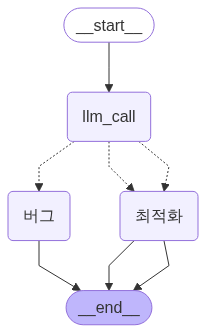

In [4]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
response = app.invoke(
    """
 
    def calculator(a,b):
       return a+b
    """)
response

'코드를 제공해 주셔야 스타일을 분석해 드릴 수 있습니다. 분석할 코드를 입력해 주시면, 그에 대한 스타일 분석을 진행하겠습니다.'